<a href="https://colab.research.google.com/github/Vishita7/Deep-Learning/blob/main/Trainable_parameter_%26_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trainable Parms and NN Regression
###Vishita yadav





##Recreate the math in the `model.summmary()` below

First, let's make sure you understand the concept of weights and biases. 

Imagine that your data set has 20,000 rows and 50 columns. You are to count the trainable parameters and show the output shape for each layer in the network 





In [ ]:
# import modules
# for data analysis and plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data preperation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# for neural net modeling
!pip install keras-visualizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_visualizer import visualizer 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### model.summary()

In [ ]:
n_features = 50

A = 3
B = 5
C = 5
D = 3
E = 5
F = 5
G = 2

In [ ]:
# reset names in the model summary
from keras import backend as K
K.clear_session()

In [ ]:
#Model
model1 = Sequential()
model1.add(Dense(A, activation='relu', input_shape=(n_features,)))
model1.add(Dense(B, activation='relu'))
model1.add(Dense(C, activation='relu'))
model1.add(Dense(D, activation='relu'))
model1.add(Dense(E, activation='relu'))
model1.add(Dense(F, activation='relu'))
model1.add(Dense(G, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 153       
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 5)                 20        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [ ]:
visualizer(model1, format='png', view=True)

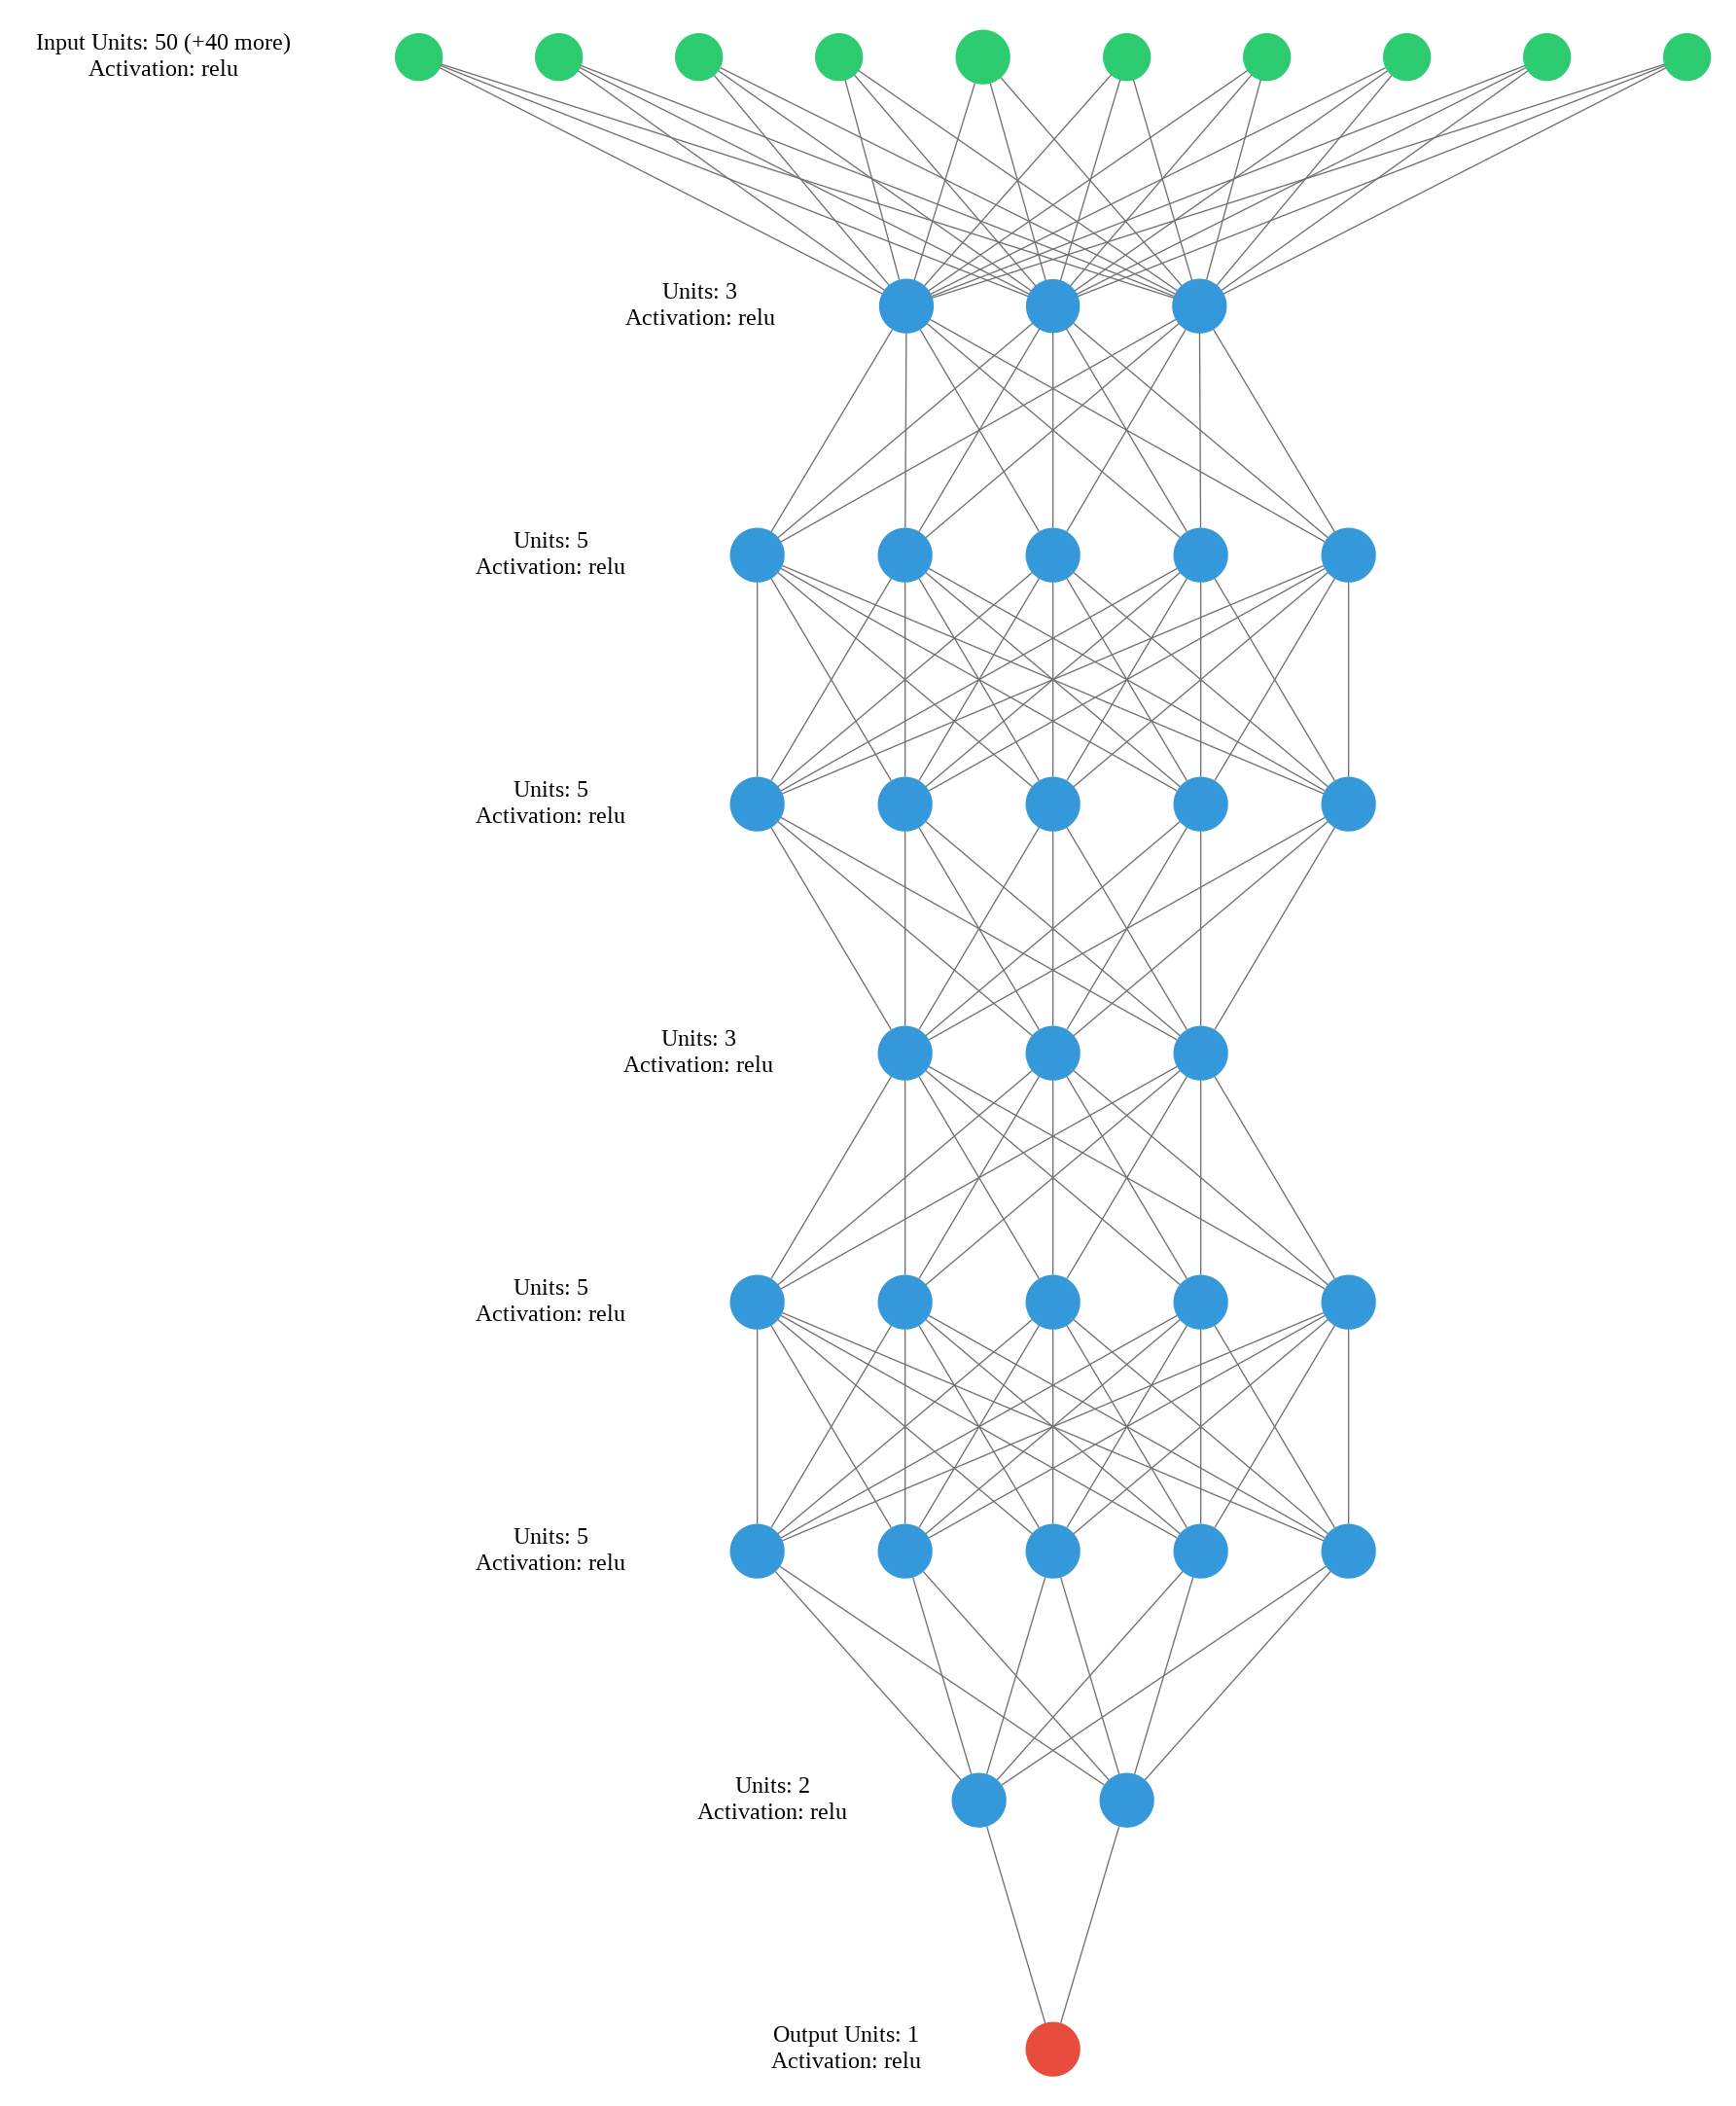

#### Math in model summary above using the outputs from 7 digit student ID

### Layer `dense` (153 trainable parameters, 50 weights, 3 bias)
Trainable parameters in Layer dense:



$50*3 + 3 = 153$

50 weights and 3 bias. There are 50 inputs going into a hidden layer with 3 hidden unit, and there is 1 bias for each of the 3 hidden units in the layer.





### Layer `dense_1` (20 trainable parameters, 3 weights, 5 bias)
Trainable parameters in Layer dense_1:

$3*5 + 5 = 20$

3 weights and 5 bias. There are 3 inputs going into a hidden layer with 5 hidden unit, and there is 1 bias for each of the 5 hidden units in the layer.



### Layer `dense_2` (30 trainable parameters, 5 weights, 5 bias)
Trainable parameters in Layer dense_2:

$5*5 + 5 = 30$

5 weights and 5 bias. There are 5 inputs going into a hidden layer with 5 hidden unit, and there is 1 bias for each of the 5 hidden units in the layer.

### Layer `dense_3` (18 trainable parameters, 5 weights, 3 bias)
Trainable parameters in Layer dense_3:

$5*3 + 3 = 18$

5 weights and 3 bias. There are 5 inputs going into a hidden layer with 3 hidden unit, and there is 1 bias for each of the 3 hidden units in the layer.

### Layer `dense_4` (20 trainable parameters, 3 weights, 5 bias)
Trainable parameters in Layer dense_4:

$3*5 + 5 = 20$

3 weights and 5 bias. There are 3 inputs going into a hidden layer with 5 hidden unit, and there is 1 bias for each of the 5 hidden units in the layer.

### Layer `dense_5` (30 trainable parameters, 5 weights, 5 bias)
Trainable parameters in Layer dense:

$5*5 + 5 = 30$

5 weights and 5 bias. There are 50 inputs going into a hidden layer with 5 hidden unit, and there is 1 bias for each of the 5 hidden units in the layer.

### Layer `dense_6` (12 trainable parameters, 5 weights, 2 bias)
Trainable parameters in Layer dense:

$5*2 + 2 = 12$

5 weights and 2 bias. There are 50 inputs going into a hidden layer with 2 hidden unit, and there is 1 bias for each of the 2 hidden units in the layer.

### Layer `dense_7` (3 trainable parameters, 2 weights, 1 bias)
Trainable parameters in Layer dense:

$2*1 + 1 = 3$

2 weights and 1 bias. There are 2 inputs going into a hidden layer with 1 hidden unit, and there is 1 bias for each of the 1 hidden units in the layer.

# (50 points) **Q2.** Fit and evaluate a model using real-world data
I gave you (mostly) clean data to work with 😃
These are hourly observations of weather vs. energy (electricity) consumption in New England. This is a real-world dataset you can brag about on your resume when you apply to jobs.


### Read Airport Weather vs. Energy Consumption data

In [ ]:
# https://drive.google.com/file/d/1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP/view
!gdown 1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP

Downloading...
From: https://drive.google.com/uc?id=1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP
To: /content/cleanweather_energy.csv
100% 25.4k/25.4k [00:00<00:00, 29.8MB/s]


In [ ]:
df = pd.read_csv('cleanweather_energy.csv')
print("The data set has {} rows and {} columns" .format(df.shape[0], df.shape[1]))
print('\n')
display(df.columns)
print('\n')
print(df.info())


The data set has 96 rows and 37 columns




Index(['valid', 'station', 'valid.1', 'lon', 'lat', 'tmpf', 'dwpf', 'relh',
       'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1',
       'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct',
       'peak_wind_time', 'feel', 'metar', 'snowdepth', 'H', 'Date', 'HE',
       'MWh'],
      dtype='object')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid              96 non-null     object 
 1   station            96 non-null     object 
 2   valid.1            96 non-null     object 
 3   lon                96 non-null     float64
 4   lat                96 non-null     float64
 5   tmpf               96 non-null     float64
 6   dwpf               96 non-null     float64
 7   relh               96 non-null     float64
 8   drct               96 non-null     float64
 9   sknt               96 non-null     float64
 10  p01i               96 non-null     float64
 11  alti               96 non-null     float64
 12  mslp               96 non-null     float64
 13  vsby               96 non-null     float64
 14  gust               22 non-null     float64
 15  skyc1              96 non-null     object 
 16  skyc2              96 non-

In [ ]:
display(df.head())


,valid,station,valid.1,lon,lat,tmpf,dwpf,relh,drct,sknt,...,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,H,Date,HE,MWh
0,2020-08-25 00:00:00,BDL,2020-08-25 00:55:00,-72.6825,41.9381,73.9,69.1,84.97,240.0,3.0,...,M,M,M,M,KBDL 250055Z AUTO 24002KT 10SM CLR 23/21 A2990...,M,D,2020-08-25 00:00:00,0,14986.78
1,2020-08-25 01:00:00,BDL,2020-08-25 01:55:00,-72.6825,41.9381,73.9,70.0,87.63,260.0,4.0,...,M,M,M,M,KBDL 250155Z AUTO 21002KT 10SM CLR 23/21 A2988...,M,D,2020-08-25 01:00:00,1,14433.29
2,2020-08-25 02:00:00,BDL,2020-08-25 02:55:00,-72.6825,41.9381,72.0,70.0,93.43,230.0,5.0,...,M,M,M,M,KBDL 250255Z AUTO 19004KT 10SM CLR 23/21 A2987...,M,D,2020-08-25 02:00:00,2,14152.24
3,2020-08-25 03:00:00,BDL,2020-08-25 03:55:00,-72.6825,41.9381,73.0,70.0,90.32,230.0,5.0,...,M,M,M,M,KBDL 250355Z AUTO 23002KT 10SM CLR 22/21 A2987...,M,D,2020-08-25 03:00:00,3,13846.08
4,2020-08-25 04:00:00,BDL,2020-08-25 04:55:00,-72.6825,41.9381,72.0,70.0,93.43,190.0,5.0,...,M,M,M,M,KBDL 250455Z AUTO 00000KT 10SM CLR 22/21 A2987...,M,D,2020-08-25 04:00:00,4,13872.55


####Data Preprocessing
Missing Values, split data, and MinMax Normalization





In [ ]:
#missing values in data columns
df.isna().sum()

valid                 0
station               0
valid.1               0
lon                   0
lat                   0
tmpf                  0
dwpf                  0
relh                  0
drct                  0
sknt                  0
p01i                  0
alti                  0
mslp                  0
vsby                  0
gust                 74
skyc1                 0
skyc2                 0
skyc3                 0
skyc4                 0
skyl1                 0
skyl2                 0
skyl3                 0
skyl4                 0
wxcodes               0
ice_accretion_1hr     0
ice_accretion_3hr     0
ice_accretion_6hr     0
peak_wind_gust        0
peak_wind_drct        0
peak_wind_time        0
feel                  0
metar                 0
snowdepth             0
H                     0
Date                  0
HE                    0
MWh                   0
dtype: int64

The Wind Gust column gust has 74 missing values. 

In [ ]:
#Column Selection for Model
X= df[['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'HE']]
y= df['MWh']


In [ ]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

NameError: ignored

In [ ]:
# split into X_train and X_test(80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(76, 6) (20, 6) (76,) (20,)


In [ ]:
# MinMax Scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Build, Compile, and Run the Model
    Two hidden layers with 6,3,1 biases 
    Relu Activation
    RmsProp Optimizer
    Early stopping with patience equal to 10 while monitoring validation loss

In [ ]:
# reset names in the model summary
from keras import backend as K
K.clear_session()

In [ ]:
# build the model
#input shape equal to the number of features in X_train dataset 
#2 hidden layers 
model = Sequential()
model.add(Dense(6, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


### Visualization

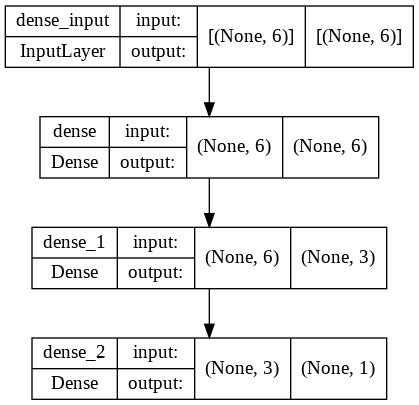

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
visualizer(model, format='png', view=True)

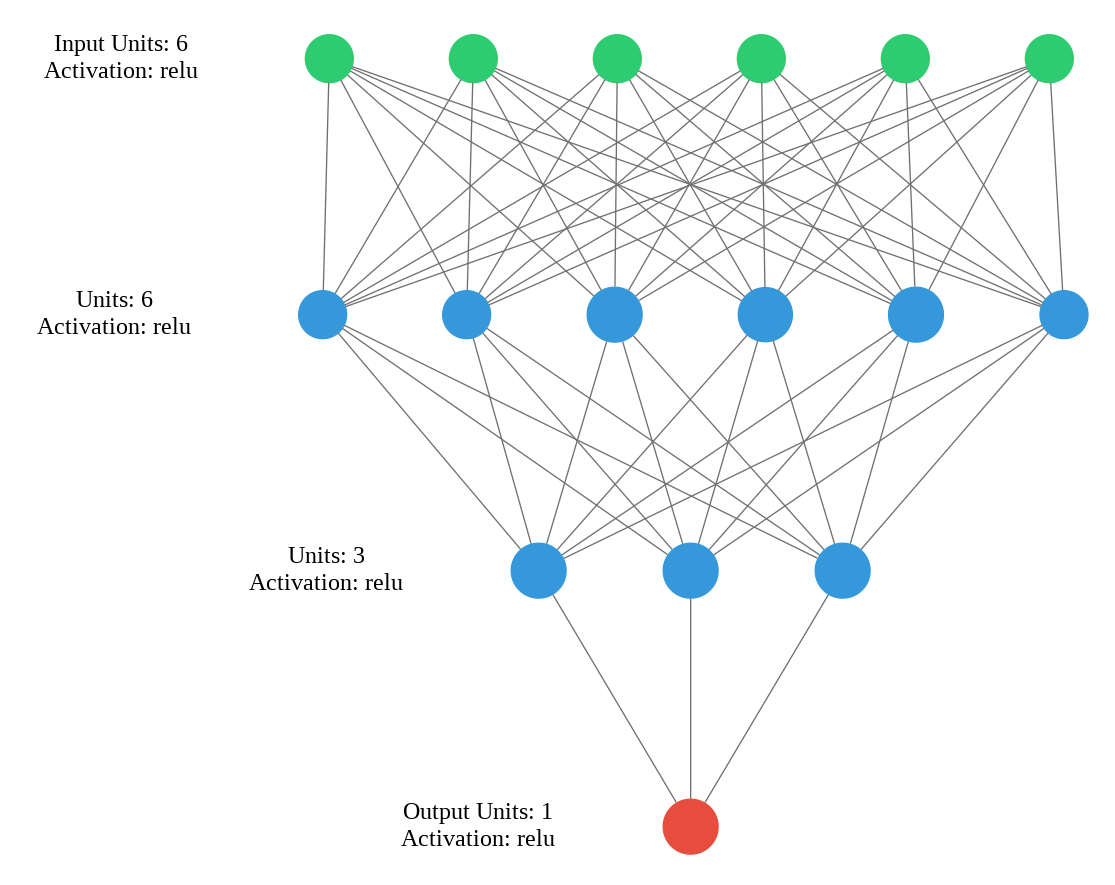

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10, # you can choose a big value!
                   restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

In [ ]:
# run the model and store it as "history" to visualize 
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es], # early stopping callbacks
                    epochs=5000, # set this to a big number
                    batch_size=10, # hyperparameter
                    shuffle=True, # shuffle the data
                    verbose=1) # this prints the output as the model trains

### learning Curves 

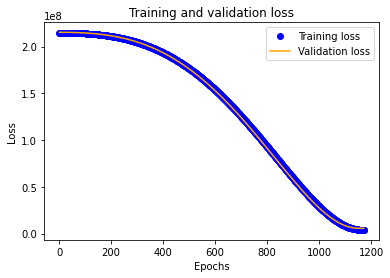

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

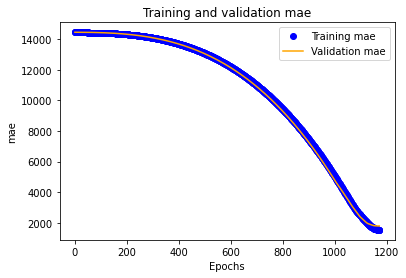

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

###Scatterplot 

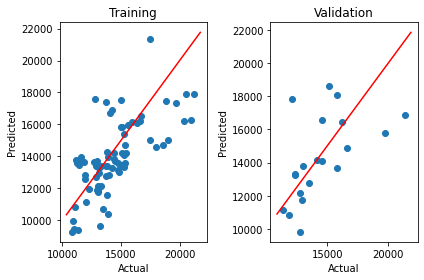

In [ ]:
# scatterplot of actual vs. pred
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics

pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("MAE for training data is",mean_absolute_error(y_train, trainpreds)) # train
print("MAE for test data is",mean_absolute_error(y_test, pred)) # test

print("R^2 value for training data is",r2_score(y_train, trainpreds)) # train
print("R^2 value for test data is",r2_score(y_test, pred)) # test

print("Mean sqaured value for training data is",mean_squared_error(y_train, trainpreds)) # train
print("Mean sqaured value for test data is",mean_squared_error(y_test, pred)) # test

MAE for training data is 1575.9476639597044
MAE for test data is 1797.7925898437497
R^2 value for training data is 0.3549728151188364
R^2 value for test data is 0.12927215036103634
Mean sqaured value for training data is 3983708.9737175666
Mean sqaured value for test data is 5578496.424637314


#### Model with Dropout layer
    Two hidden layers with 6,3,1 biases
    Dropout value 0.2 
    Relu Activation
    RmsProp Optimizer
    Early stopping with patience equal to 10 while monitoring validation loss

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
# Model
model = Sequential()
model.add(Dense(6, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


### Visualization

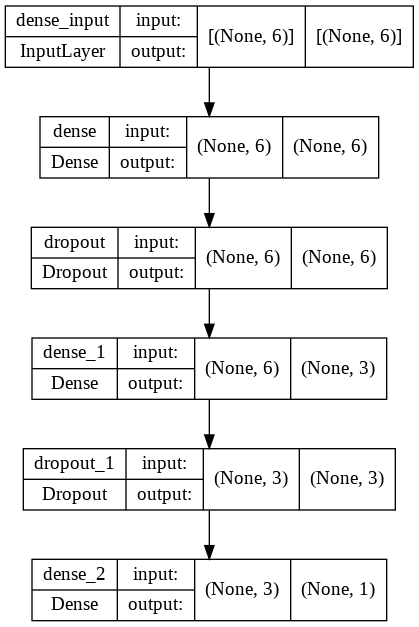

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=15, 
                   restore_best_weights = True) 

In [ ]:
# fit the model!
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es], # early stopping callbacks
                    epochs=5000, # set to a big number
                    batch_size=15, # hyperparameter
                    shuffle=True, #shuffle your data
                    verbose=1) # this prints the output as the model trains

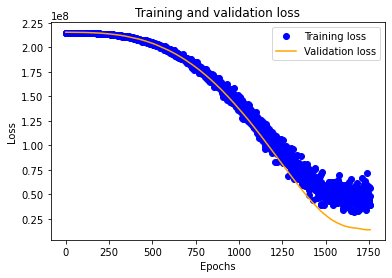

In [ ]:
# the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

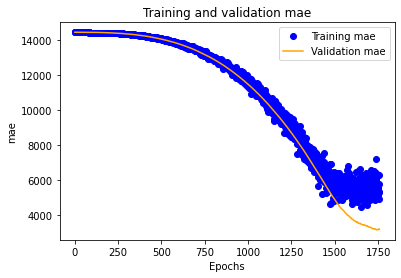

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

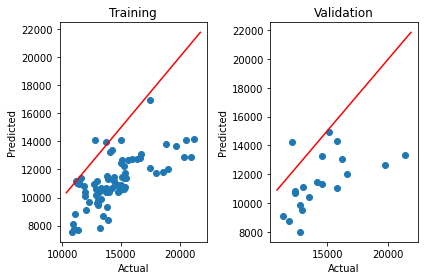

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()


###Error Metrics

In [ ]:
# metrics

pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("MAE for training data is",mean_absolute_error(y_train, trainpreds)) # train
print("MAE for test data is",mean_absolute_error(y_test, pred)) # test

print("R^2 value for training data is",r2_score(y_train, trainpreds)) # train
print("R^2 value for test data is",r2_score(y_test, pred)) # test

print("Mean sqaured value for training data is",mean_squared_error(y_train, trainpreds)) # train
print("Mean sqaured value for test data is",mean_squared_error(y_test, pred)) # test

MAE for training data is 3312.447612304688
MAE for test data is 3165.255349609375
R^2 value for training data is -1.3000053431411165
R^2 value for test data is -1.1132116714697973
Mean sqaured value for training data is 14204908.164851496
Mean sqaured value for test data is 13538723.67661615


### Five Bullet Points
    Write five bullets about how your experience went
    for example: Did you try many different architectures or 
    did you just get lucky on your first try? 
    Were you nervous or excited to build your first model on 
    real-world data. How did you ensure your model didn't overfit 
    or underfit? Any weird patterns in the scatterplot or error metrics? Be thoughtful here.

Here are a few observations that I made while modeling with different architectures and parameters. 
1.  The model ran for longer duration with increased layer count (16,8,4,2), and appeared to become overfit with learning curve:

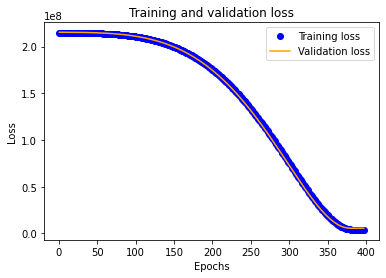  
2.  The Model with smaller batch size(equal to 10 as compared to higher values)was giving better outcome. As batch sizes increased(equal to 15), the accuracy curve showed a weird pattern as follows: 

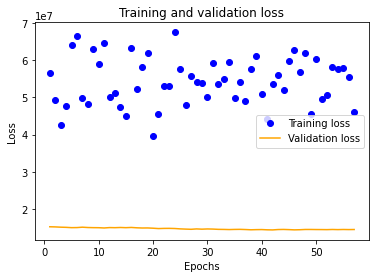

3. When the dropout value was higher than 0.2, the model failed to perform well. For example, when the dropout value was 0.5, the predicted value scatterplot looked like this. 

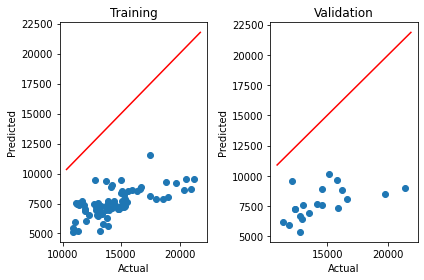

4. In the model with Drop out, there was no improvement compared to the model without it. On larger data sets, it might show a better result.

5. As architectural complexity increased, model learning took longer, and adding tuning parameters didn't improve the performance over simple architectural models significantly.

